In [1]:
# retrieve dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns; sns.set_theme()
from sklearn import preprocessing

In [2]:
spoon_input = pd.read_csv("recipe_stats.csv")
spoon_input.head()

food_pd = pd.read_csv("food_category.csv")
food_pd

ttest_pd = pd.read_csv("ttestdef.csv")
food_pd

,Type,Value1,Value2
0,egg,Breakfast,Vegetarian
1,frittata,Breakfast,Vegetarian
2,muffin,Breakfast,Vegetarian
3,omelet,Breakfast,Vegetarian
4,waffle,Breakfast,Vegetarian
...,...,...,...
213,pastries,Dessert,Vegetarian
214,flan,Dessert,Vegetarian
215,beignet,Dessert,Vegetarian
216,marshmallow,Dessert,Vegetarian


In [3]:
spoon_input["name lower"] = spoon_input["Name"].str.lower()
spoon_input = spoon_input.loc[(spoon_input["Servings"] != 1) & (spoon_input["Calories"] < 6400) , :]
spoon_input = spoon_input.drop(["Cuisine", "Sustainable", "Cheap"], axis = 1)
spoon_input.head()

,Name,Cost,Protein (g),Calories,Fat (g),Servings,Preparation Time (m),Health Score,Gluten Free,Vegetarian,Dairy Free,name lower
0,Butternut Squash Gnocchi With Whiskey Cream Sauce,3.72,14,527,23,4,45,11.0,False,False,False,butternut squash gnocchi with whiskey cream sauce
1,Oreo Cookies & Cream No-Bake Cheesecake,0.48,2,214,18,20,45,0.0,False,True,False,oreo cookies & cream no-bake cheesecake
2,Philly Cheesesteak Grilled Wraps,3.55,27,412,23,4,45,32.0,True,False,True,philly cheesesteak grilled wraps
3,Beef Tenderloin With Creamy Alouette® Mushroom...,1.74,11,371,33,2,45,7.0,True,False,False,beef tenderloin with creamy alouette® mushroom...
4,Mussels & Clams in White Wine {Cozze e Vongole},2.52,2,116,4,4,45,18.0,True,True,True,mussels & clams in white wine {cozze e vongole}


In [4]:
# copy the data
spoon_pd = spoon_input.copy()
  
# apply normalization techniques by Column 1

def scale_value(feature):
    column = feature
    spoon_pd[column] = (spoon_pd[column] - spoon_pd[column].min()) / (spoon_pd[column].max() - spoon_pd[column].min())    
    return spoon_pd[column]


scale_value("Cost")
scale_value("Protein (g)")
scale_value("Calories")
scale_value("Servings")
scale_value("Fat (g)")
scale_value("Preparation Time (m)")
scale_value("Health Score")
# view normalized data

display(spoon_pd)

,Name,Cost,Protein (g),Calories,Fat (g),Servings,Preparation Time (m),Health Score,Gluten Free,Vegetarian,Dairy Free,name lower
0,Butternut Squash Gnocchi With Whiskey Cream Sauce,0.227864,0.056911,0.158203,0.070336,0.016949,0.061069,0.11,False,False,False,butternut squash gnocchi with whiskey cream sauce
1,Oreo Cookies & Cream No-Bake Cheesecake,0.027245,0.008130,0.061865,0.055046,0.152542,0.061069,0.00,False,True,False,oreo cookies & cream no-bake cheesecake
2,Philly Cheesesteak Grilled Wraps,0.217337,0.109756,0.122807,0.070336,0.016949,0.061069,0.32,True,False,True,philly cheesesteak grilled wraps
3,Beef Tenderloin With Creamy Alouette® Mushroom...,0.105263,0.044715,0.110188,0.100917,0.000000,0.061069,0.07,True,False,False,beef tenderloin with creamy alouette® mushroom...
4,Mussels & Clams in White Wine {Cozze e Vongole},0.153560,0.008130,0.031702,0.012232,0.016949,0.061069,0.18,True,True,True,mussels & clams in white wine {cozze e vongole}
...,...,...,...,...,...,...,...,...,...,...,...,...
903,Easy Pork Chops on Stuffing,0.139319,0.130081,0.105263,0.048930,0.033898,0.061069,0.34,False,False,False,easy pork chops on stuffing
904,Buttery Pull Apart Monkey Bread,0.018576,0.024390,0.116651,0.064220,0.118644,0.061069,0.03,False,True,False,buttery pull apart monkey bread
905,Sterling Cooper Blini with Caviar,0.013003,0.004065,0.021853,0.021407,0.118644,0.061069,0.00,False,False,False,sterling cooper blini with caviar
906,Bacon Wrapped Filet Mignon,0.021672,0.012195,0.026162,0.027523,0.016949,0.061069,0.00,True,False,True,bacon wrapped filet mignon


In [5]:
spoon_input["Food Type"] = "Other"
spoon_input["Meat Type"] = "Other"

for row, col in food_pd.iterrows():
    spoon_input["Food Type"] = np.where(spoon_input["name lower"].str.contains(col[0]), col[1], spoon_input["Food Type"])
    spoon_input["Meat Type"] = np.where(spoon_input["name lower"].str.contains(col[0]), col[2], spoon_input["Meat Type"])
    
# spoon_pd.to_csv("spoon.csv", index = True, header = True)
# spoon_pd["Meat Type"].value_counts()

In [6]:
spoon_pd["Food Type"] = "Other"
spoon_pd["Meat Type"] = "Other"

for row, col in food_pd.iterrows():
    spoon_pd["Food Type"] = np.where(spoon_pd["name lower"].str.contains(col[0]), col[1], spoon_pd["Food Type"])
    spoon_pd["Meat Type"] = np.where(spoon_pd["name lower"].str.contains(col[0]), col[2], spoon_pd["Meat Type"])
    
spoon_pd.to_csv("spoon.csv", index = True, header = True)
spoon_pd["Meat Type"].value_counts()
    

Vegetarian    596
Meat          245
Name: Meat Type, dtype: int64

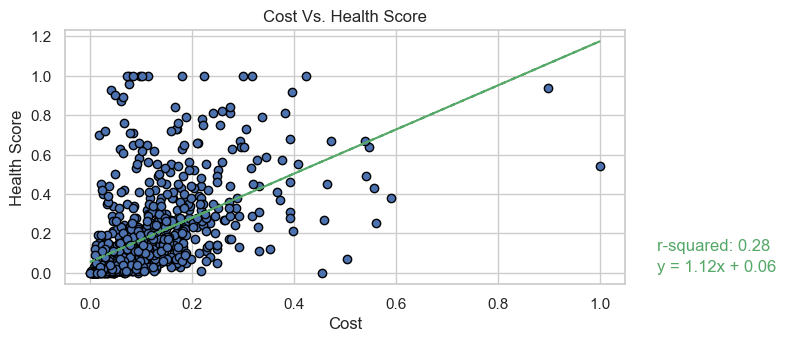

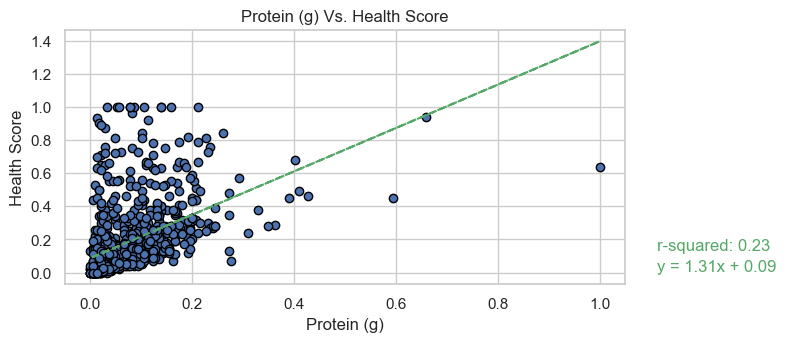

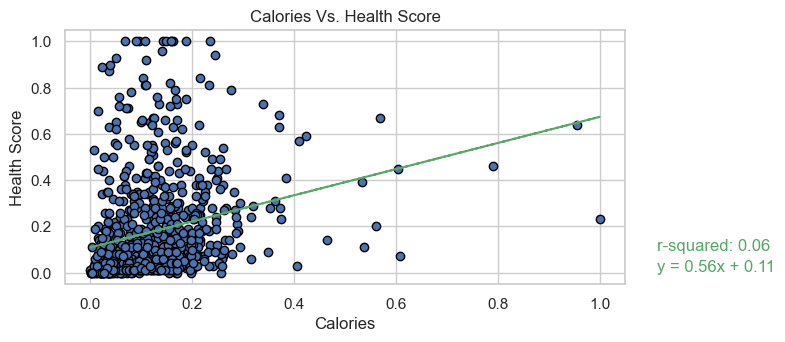

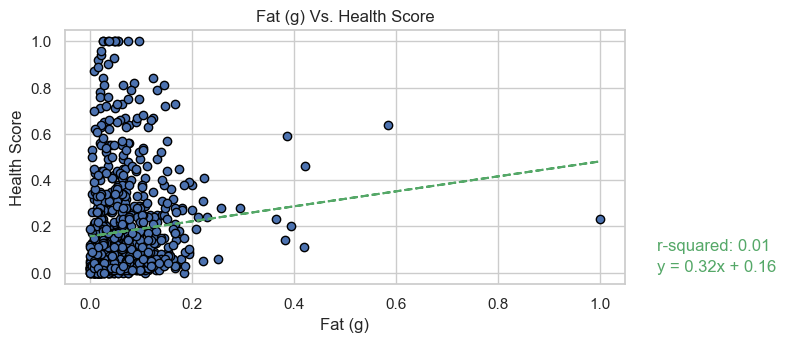

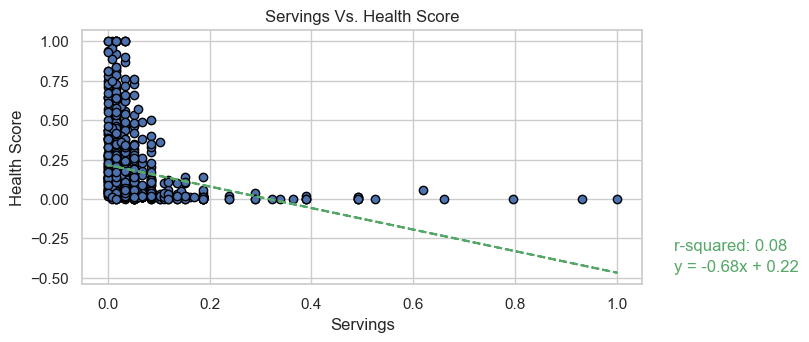

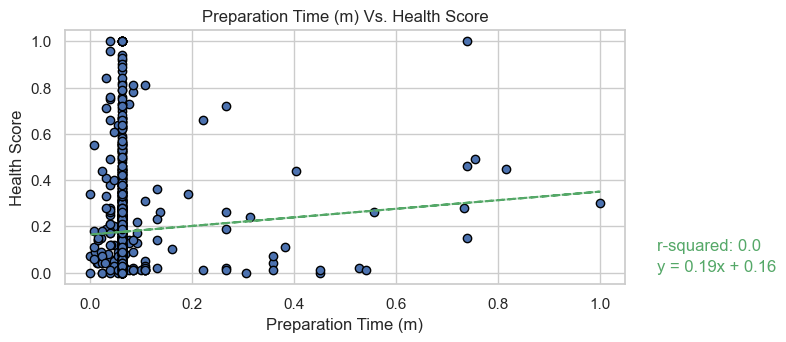

In [30]:
y_axis_list = ["Health Score"]
x_axis_list = ["Cost", "Protein (g)", "Calories", "Fat (g)", "Servings", "Preparation Time (m)", "Health Score"]

for y in y_axis_list:
    for x in x_axis_list:
        if x != y:
            plt.scatter(spoon_pd[x], spoon_pd[y], edgecolor = "black", color=None)
            (slope, intercept, rvalue, pvalue, stderr) = st.linregress(spoon_pd[x], spoon_pd[y])
            regress_values = intercept + slope*spoon_pd[x]
            r_squared_value = f"r-squared: {round(rvalue**2, 2)}"
            line_eq = f"y = {str(round(slope, 2))}x + {round(intercept, 2)}"
            plt.plot(spoon_pd[x], regress_values, "g--")
            plt.ylabel(f"{y}")
            plt.xlabel(f"{x}")
            plt.title(f"{x} Vs. {y}")
            plt.figtext(1.05, .42, r_squared_value, color = "g")
            plt.figtext(1.05, .376, line_eq, color = "g")
            plt.subplots_adjust(bottom = 0.35, right = 1)
            filename = "Overall" + x + "Vs" + y + ".png"
            plt.savefig(filename)
            plt.show()
            

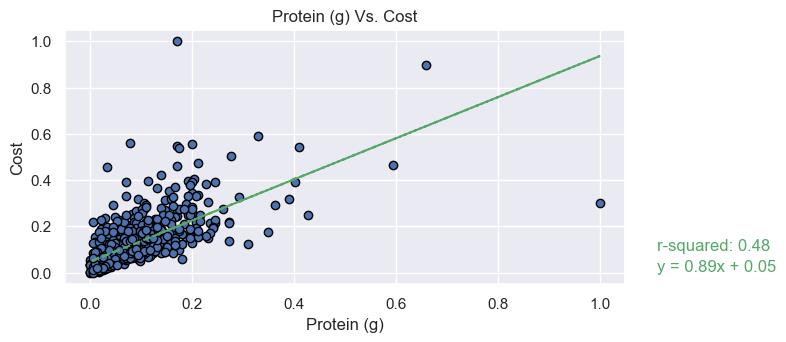

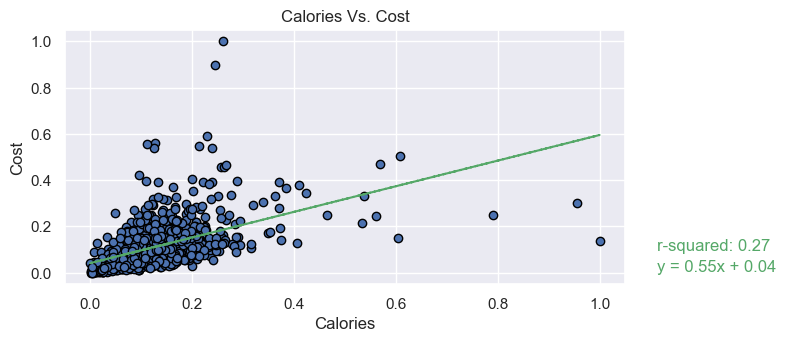

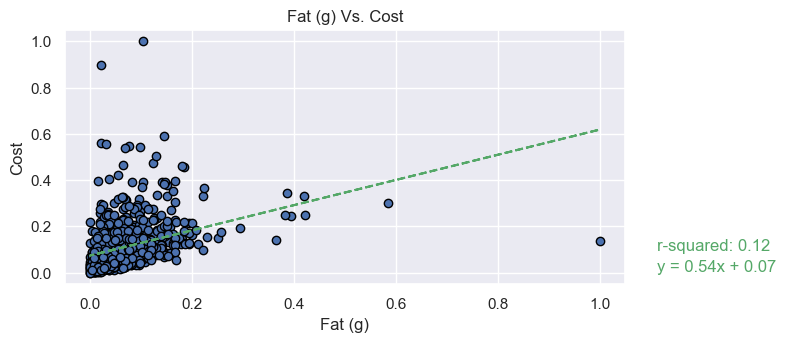

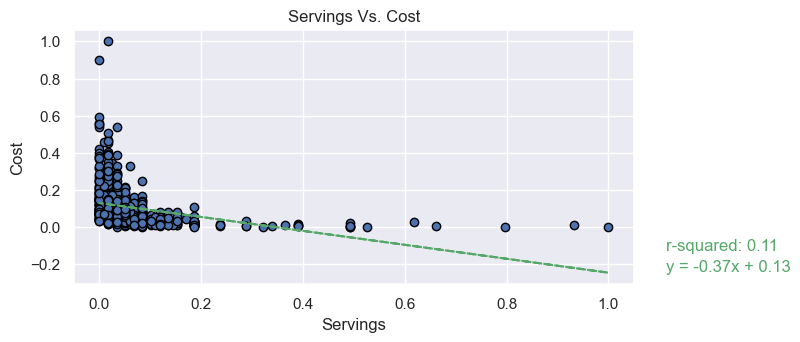

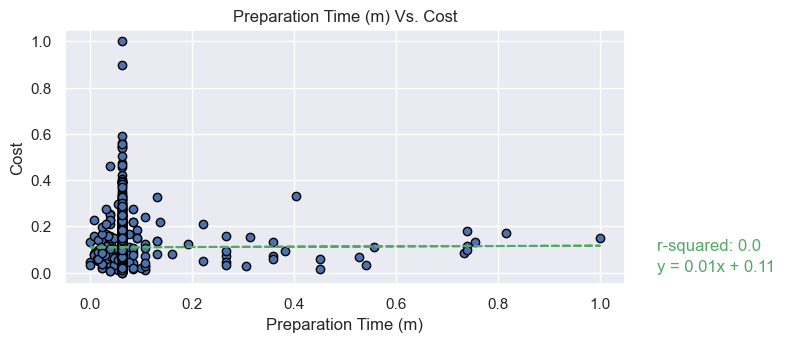

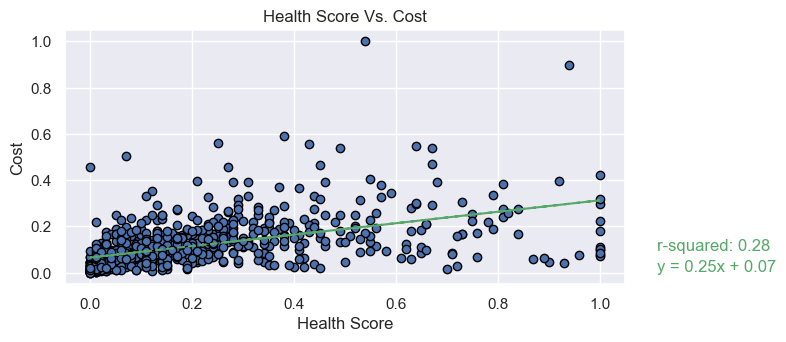

In [8]:
y_axis_list = ["Cost"]
x_axis_list = ["Cost", "Protein (g)", "Calories", "Fat (g)", "Servings", "Preparation Time (m)", "Health Score"]

for y in y_axis_list:
    for x in x_axis_list:
        if x != y:
            plt.scatter(spoon_pd[x], spoon_pd[y], edgecolor = "black", color=None)
            (slope, intercept, rvalue, pvalue, stderr) = st.linregress(spoon_pd[x], spoon_pd[y])
            regress_values = intercept + slope*spoon_pd[x]
            r_squared_value = f"r-squared: {round(rvalue**2, 2)}"
            line_eq = f"y = {str(round(slope, 2))}x + {round(intercept, 2)}"
            plt.plot(spoon_pd[x], regress_values, "g--")
            plt.ylabel(f"{y}")
            plt.xlabel(f"{x}")
            plt.title(f"{x} Vs. {y}")
            plt.figtext(1.05, .42, r_squared_value, color = "g")
            plt.figtext(1.05, .376, line_eq, color = "g")
            plt.subplots_adjust(bottom = 0.35, right = 1)
            filename = "Overall" + x + "Vs" + y + ".png"
            plt.savefig(filename)
            plt.show()

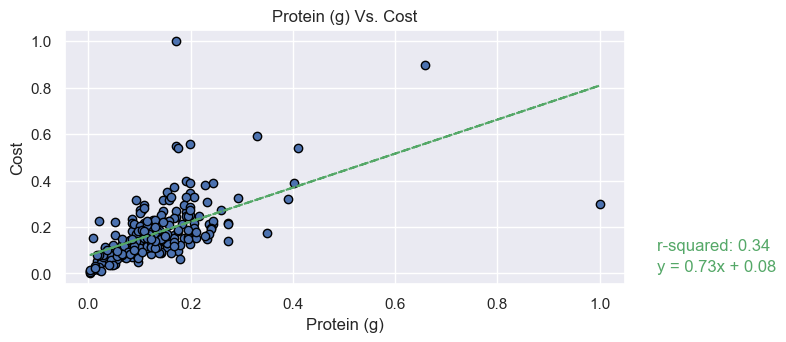

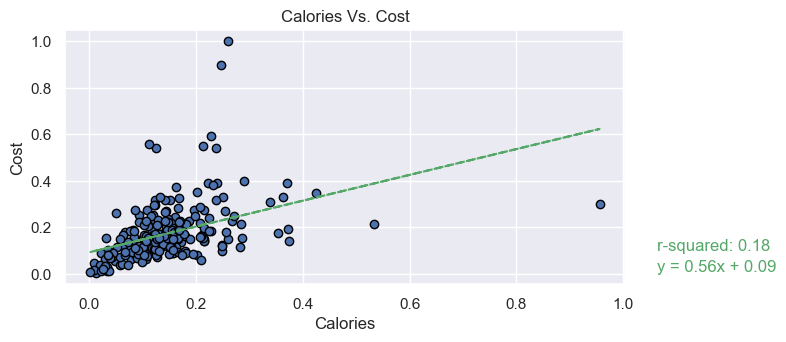

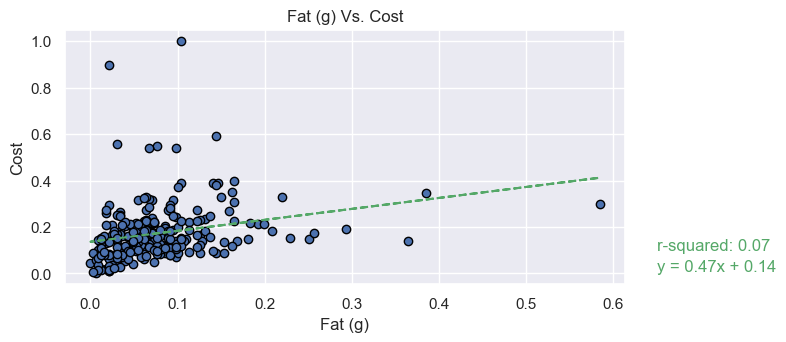

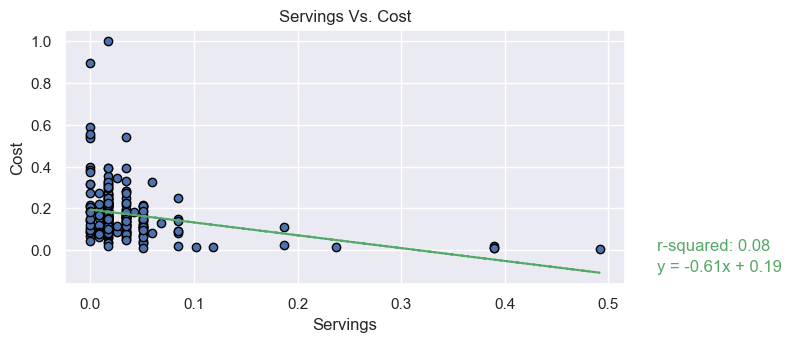

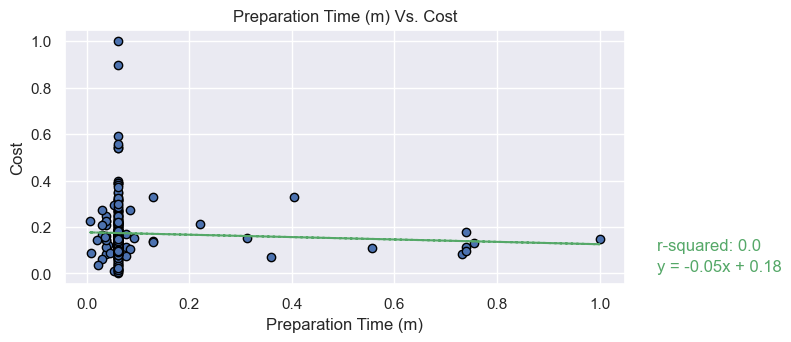

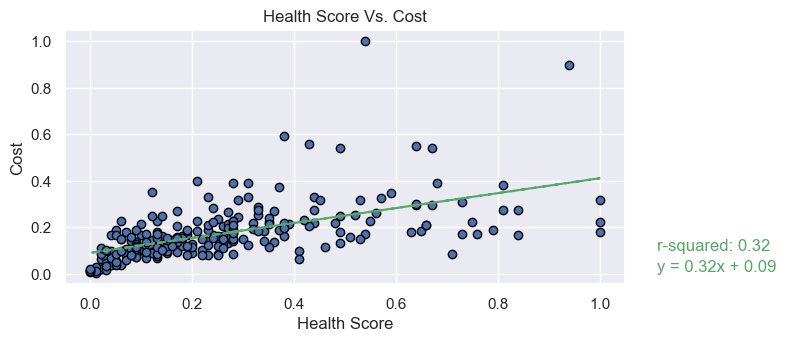

In [9]:
protein_df = spoon_pd[spoon_pd["Meat Type"] == "Meat"]

y_axis_list = ["Cost"]
x_axis_list = ["Cost", "Protein (g)", "Calories", "Fat (g)", "Servings", "Preparation Time (m)", "Health Score"]

for y in y_axis_list:
    for x in x_axis_list:
        if x != y:
            plt.scatter(protein_df[x], protein_df[y], edgecolor = "black", color=None)
            (slope, intercept, rvalue, pvalue, stderr) = st.linregress(protein_df[x], protein_df[y])
            regress_values = intercept + slope*protein_df[x]
            r_squared_value = f"r-squared: {round(rvalue**2, 2)}"
            line_eq = f"y = {str(round(slope, 2))}x + {round(intercept, 2)}"
            plt.plot(protein_df[x], regress_values, "g--")
            plt.ylabel(f"{y}")
            plt.xlabel(f"{x}")
            plt.title(f"{x} Vs. {y}")
            plt.figtext(1.05, .42, r_squared_value, color = "g")
            plt.figtext(1.05, .376, line_eq, color = "g")
            plt.subplots_adjust(bottom = 0.35, right = 1)
            filename = "Meat" + x + "Vs" + y + ".png"
            plt.savefig(filename)
            plt.show()

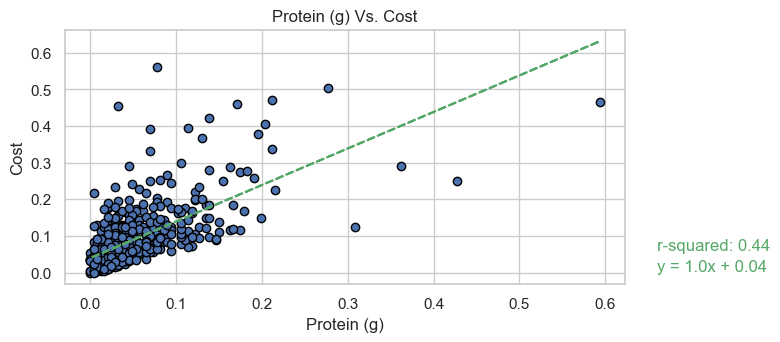

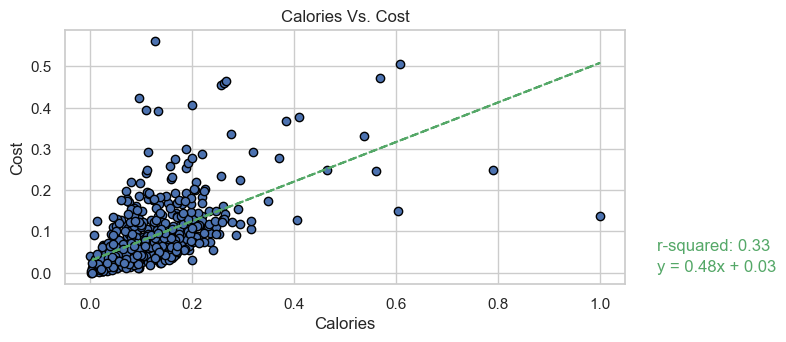

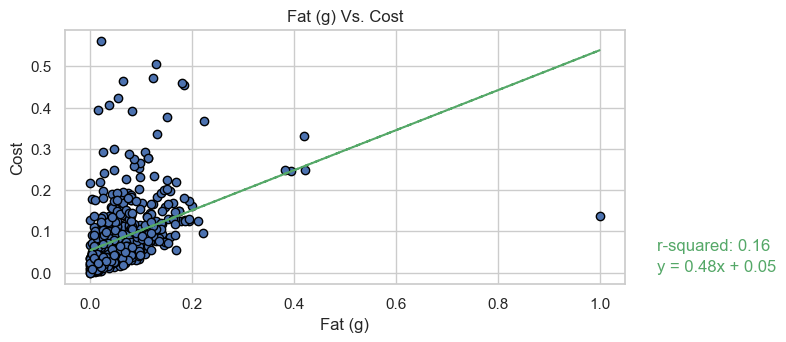

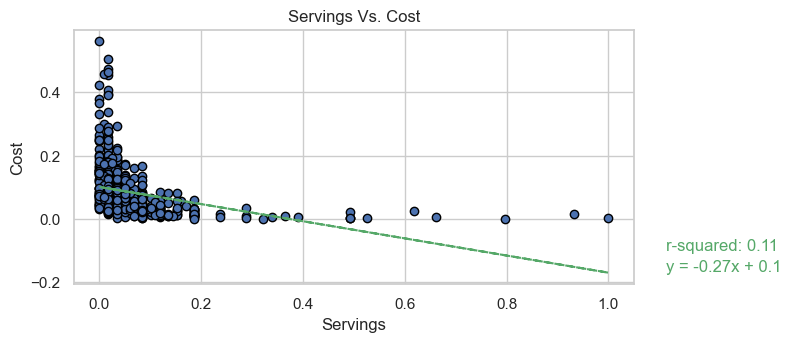

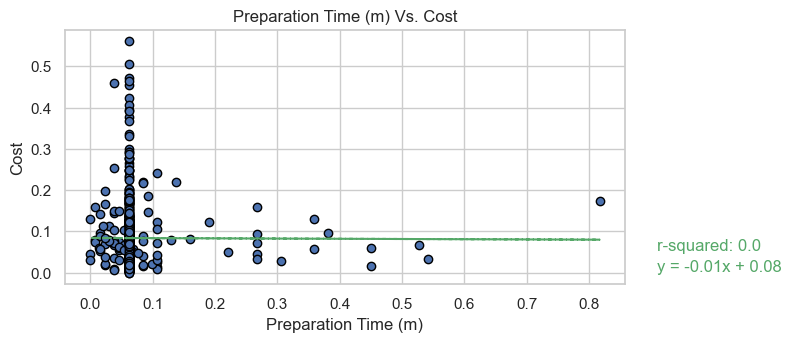

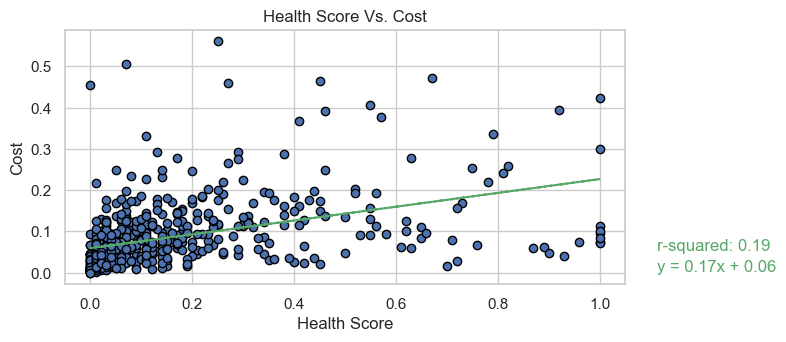

In [31]:
vegetarian_df = spoon_pd[spoon_pd["Meat Type"] != "Meat"]

y_axis_list = ["Cost"]
x_axis_list = ["Cost", "Protein (g)", "Calories", "Fat (g)", "Servings", "Preparation Time (m)", "Health Score"]

for y in y_axis_list:
    for x in x_axis_list:
        if x != y:
            plt.scatter(vegetarian_df[x], vegetarian_df[y], edgecolor = "black", color=None)
            (slope, intercept, rvalue, pvalue, stderr) = st.linregress(vegetarian_df[x], vegetarian_df[y])
            regress_values = intercept + slope*vegetarian_df[x]
            r_squared_value = f"r-squared: {round(rvalue**2, 2)}"
            line_eq = f"y = {str(round(slope, 2))}x + {round(intercept, 2)}"
            plt.plot(vegetarian_df[x], regress_values, "g--")
            plt.ylabel(f"{y}")
            plt.xlabel(f"{x}")
            plt.title(f"{x} Vs. {y}")
            plt.figtext(1.05, .42, r_squared_value, color = "g")
            plt.figtext(1.05, .376, line_eq, color = "g")
            plt.subplots_adjust(bottom = 0.35, right = 1)
            filename = "Vegetarian" + x + "Vs" + y + ".png"
            plt.savefig(filename)
            plt.show()

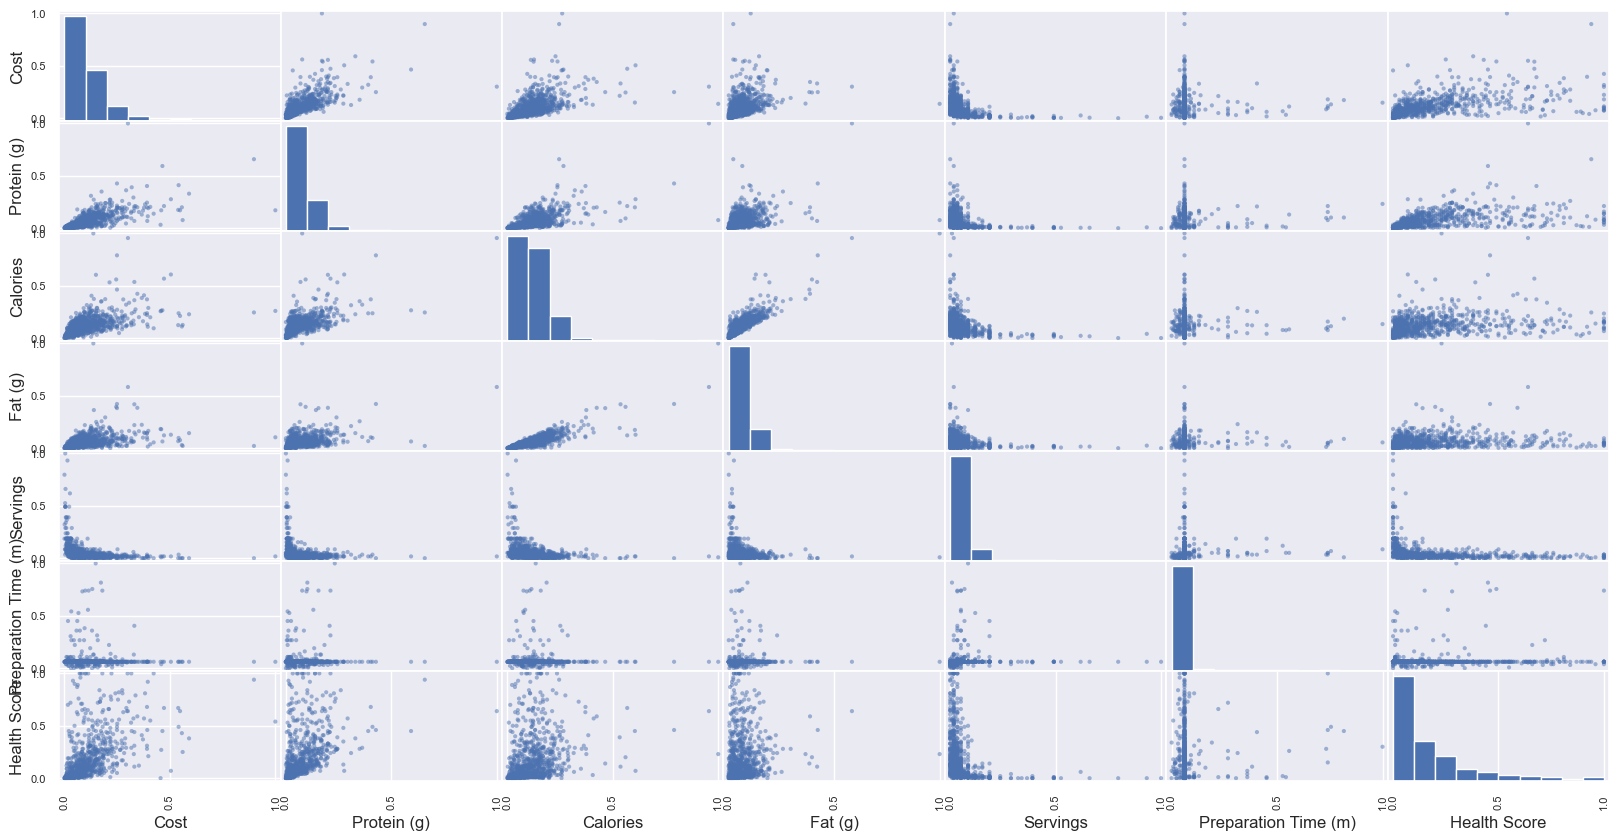

In [11]:
pd.plotting.scatter_matrix(spoon_pd[["Cost", "Protein (g)", "Calories", "Fat (g)", "Servings", "Preparation Time (m)", "Health Score"]], figsize = (20, 10))
plt.show()

In [12]:
ttest_pd

,feature,metric,val1,val2,val3,val4,val5,val6,val7,val8
0,Food Type,Cost,Pork,Veggies/Beans,Beef,Veggies/Beans,Seafood,Veggies/Beans,Poultry,Veggies/Beans
1,Food Type,Cost,Pork,Dessert,Beef,Dessert,Seafood,Dessert,Poultry,Dessert
2,Food Type,Cost,Pork,Grain/Pasta/Starch,Beef,Grain/Pasta/Starch,Seafood,Grain/Pasta/Starch,Poultry,Grain/Pasta/Starch
3,Meat Type,Cost,Meat,Vegetarian,Meat,Vegetarian,Meat,Vegetarian,Meat,Vegetarian
4,Food Type,Protein (g),Pork,Veggies/Beans,Beef,Veggies/Beans,Seafood,Veggies/Beans,Poultry,Veggies/Beans
5,Food Type,Protein (g),Pork,Dessert,Beef,Dessert,Seafood,Dessert,Poultry,Dessert
6,Food Type,Protein (g),Pork,Grain/Pasta/Starch,Beef,Grain/Pasta/Starch,Seafood,Grain/Pasta/Starch,Poultry,Grain/Pasta/Starch
7,Meat Type,Protein (g),Meat,Vegetarian,Meat,Vegetarian,Meat,Vegetarian,Meat,Vegetarian


In [13]:
spoon_grp_pd = spoon_input.groupby(["Food Type"]).agg({"Cost":["count", "mean", "median", "var", "std", "sem"]})
spoon_grp_pd.columns = ["Cost Count", "Cost Avg", "Cost Median", "Cost Var", "Cost Std", "Cost SEM"]
spoon_grp_pd.reset_index(inplace = True)
spoon_grp_pd.set_index("Food Type", inplace = True)
spoon_grp_pd.sort_values(by = ["Cost Avg"], inplace = True, ascending = False)
spoon_grp_pd

,Cost Count,Cost Avg,Cost Median,Cost Var,Cost Std,Cost SEM
Food Type,,,,,,
Seafood,63,3.613016,3.070,6.423641,2.534490,0.319316
Beef,31,3.441290,3.550,3.276958,1.810237,0.325128
Soup,23,2.620000,2.070,2.537591,1.592982,0.332160
Pork,57,2.491228,2.270,1.663336,1.289704,0.170825
Poultry,94,2.319149,2.205,3.008236,1.734427,0.178892
Dip/Sauce,20,1.739500,1.350,2.283942,1.511272,0.337931
Beverage,12,1.643333,1.235,0.955915,0.977709,0.282240
Comfort,30,1.611667,1.120,2.551552,1.597358,0.291636
Veggies/Beans,97,1.566701,1.260,1.432470,1.196858,0.121523


In [14]:
spoon_grp_v_pd = spoon_input.groupby(["Meat Type"]).agg({"Cost":["count", "mean", "median", "var", "std", "sem"]})
spoon_grp_v_pd.columns = ["Cost Count", "Cost Avg", "Cost Median", "Cost Var", "Cost Std", "Cost SEM"]
spoon_grp_v_pd.reset_index(inplace = True)
spoon_grp_v_pd.set_index("Meat Type", inplace = True)
spoon_grp_v_pd

,Cost Count,Cost Avg,Cost Median,Cost Var,Cost Std,Cost SEM
Meat Type,,,,,,
Meat,245,2.833878,2.47,3.896584,1.973977,0.126113
Vegetarian,596,1.391292,1.03,1.627552,1.275755,0.052257


In [15]:
spoon_grp_s_pd = spoon_input.agg({"Cost":["count", "mean", "median", "var", "std", "sem"]}).transpose()
spoon_grp_s_pd.columns = ["Cost Count", "Cost Avg", "Cost Median", "Cost Var", "Cost Std", "Cost SEM"]
spoon_grp_s_pd.reset_index(inplace = True)
spoon_grp_s_pd.rename(index = {0: "Cost Summary"}, inplace = True)
spoon_grp_s_pd

,index,Cost Count,Cost Avg,Cost Median,Cost Var,Cost Std,Cost SEM
Cost Summary,Cost,841.0,1.811546,1.38,2.714864,1.647685,0.056817


In [16]:
combined_df = spoon_grp_pd.append([spoon_grp_v_pd, spoon_grp_s_pd]).drop("index", axis = 1)
combined_df

,Cost Count,Cost Avg,Cost Median,Cost Var,Cost Std,Cost SEM
Seafood,63.0,3.613016,3.070,6.423641,2.534490,0.319316
Beef,31.0,3.441290,3.550,3.276958,1.810237,0.325128
Soup,23.0,2.620000,2.070,2.537591,1.592982,0.332160
Pork,57.0,2.491228,2.270,1.663336,1.289704,0.170825
Poultry,94.0,2.319149,2.205,3.008236,1.734427,0.178892
Dip/Sauce,20.0,1.739500,1.350,2.283942,1.511272,0.337931
Beverage,12.0,1.643333,1.235,0.955915,0.977709,0.282240
Comfort,30.0,1.611667,1.120,2.551552,1.597358,0.291636
Veggies/Beans,97.0,1.566701,1.260,1.432470,1.196858,0.121523
Salad/Fruit,15.0,1.329333,0.990,0.712307,0.843983,0.217915


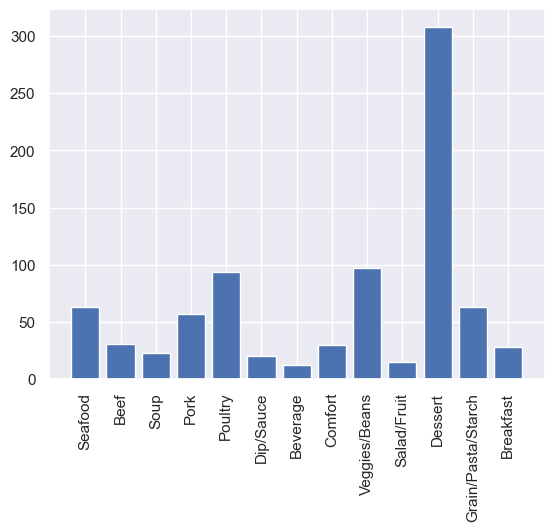

In [17]:
x_axis = np.arange(len(spoon_grp_pd))
tick_values = [value for value in x_axis]
plt.bar(x_axis, spoon_grp_pd["Cost Count"], align = "center")
plt.xticks(tick_values, spoon_grp_pd.index.values, rotation = "vertical")
plt.show()

In [18]:

spoon_veg = spoon_pd.loc[(spoon_pd["Vegetarian"] == True), :]
spoon_veg_nodes = spoon_pd.loc[(spoon_pd["Vegetarian"] == True) & (spoon_pd["Food Type"] != "dessert"), :]
spoon_carn = spoon_pd[spoon_pd["Vegetarian"] == False]

print("Veggie")
print(spoon_veg.describe())
print("Veggie No Dessert")
print(spoon_veg_nodes.describe())
print("Meat")
print(spoon_carn.describe())

Veggie
             Cost  Protein (g)    Calories     Fat (g)    Servings  \
count  315.000000   315.000000  315.000000  315.000000  315.000000   
mean     0.073423     0.031204    0.099488    0.051366    0.055556   
std      0.067689     0.027646    0.073836    0.046799    0.077455   
min      0.000000     0.000000    0.002462    0.000000    0.000000   
25%      0.030650     0.012195    0.049400    0.019878    0.016949   
50%      0.054489     0.024390    0.082795    0.042813    0.033898   
75%      0.095356     0.040650    0.133426    0.070336    0.067797   
max      0.560372     0.199187    0.604801    0.418960    0.618644   

       Preparation Time (m)  Health Score  
count            315.000000    315.000000  
mean               0.066182      0.151905  
std                0.047087      0.228150  
min                0.000000      0.000000  
25%                0.061069      0.020000  
50%                0.061069      0.060000  
75%                0.061069      0.170000  
max       

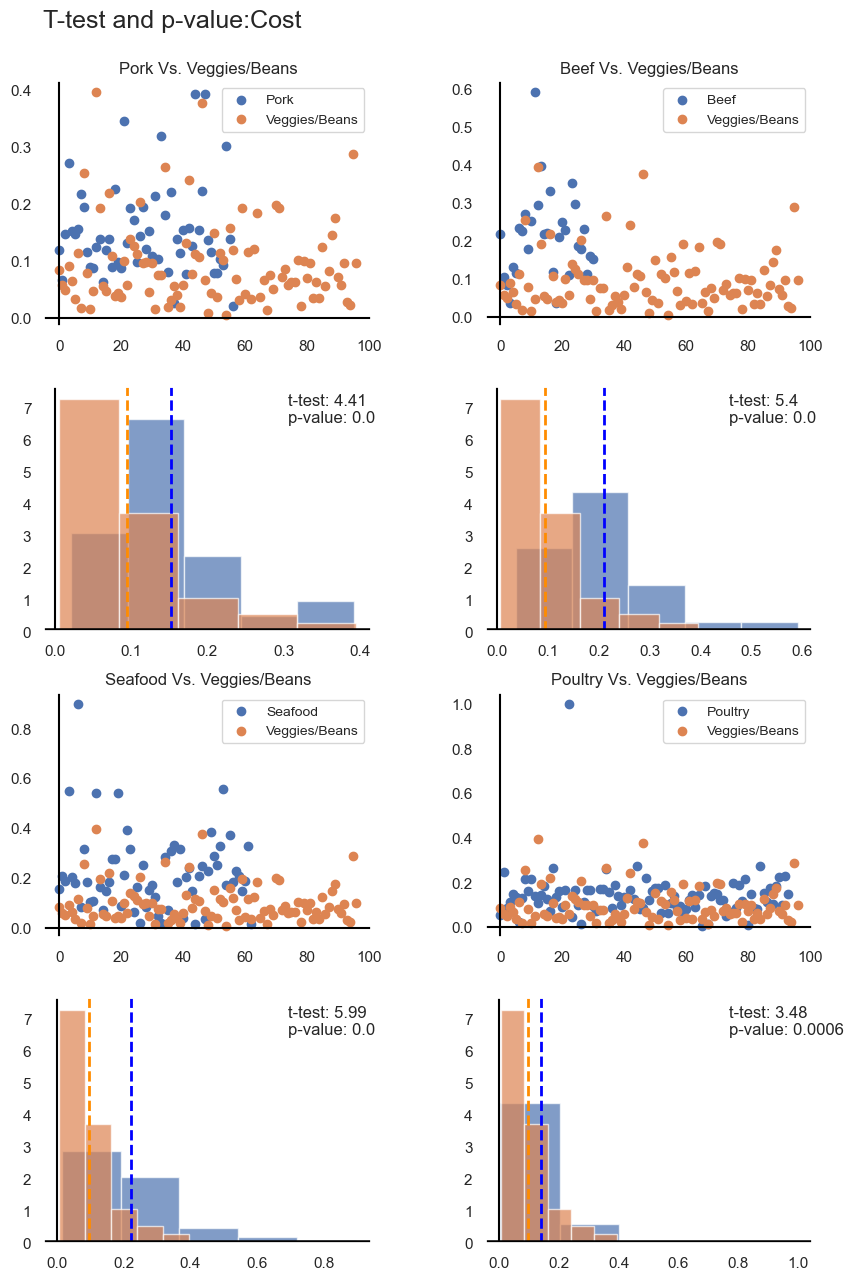

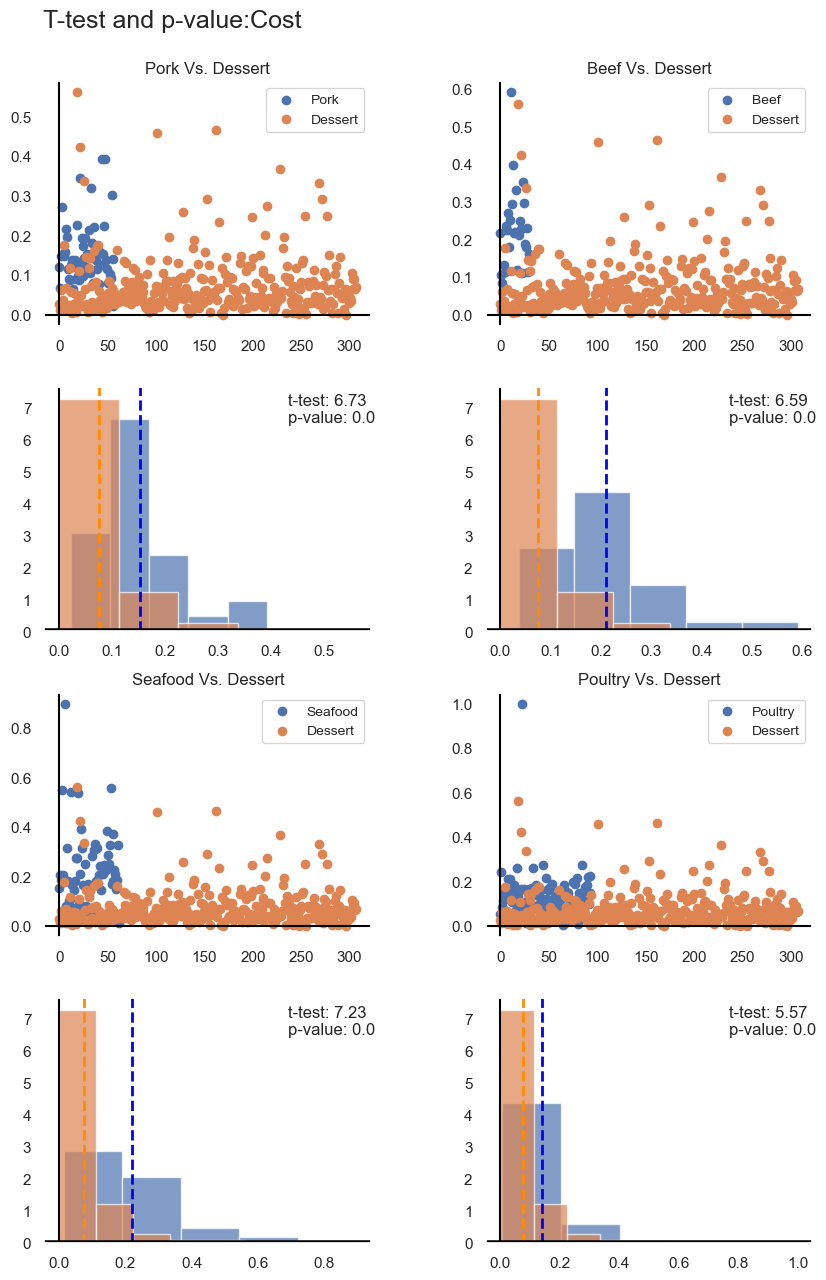

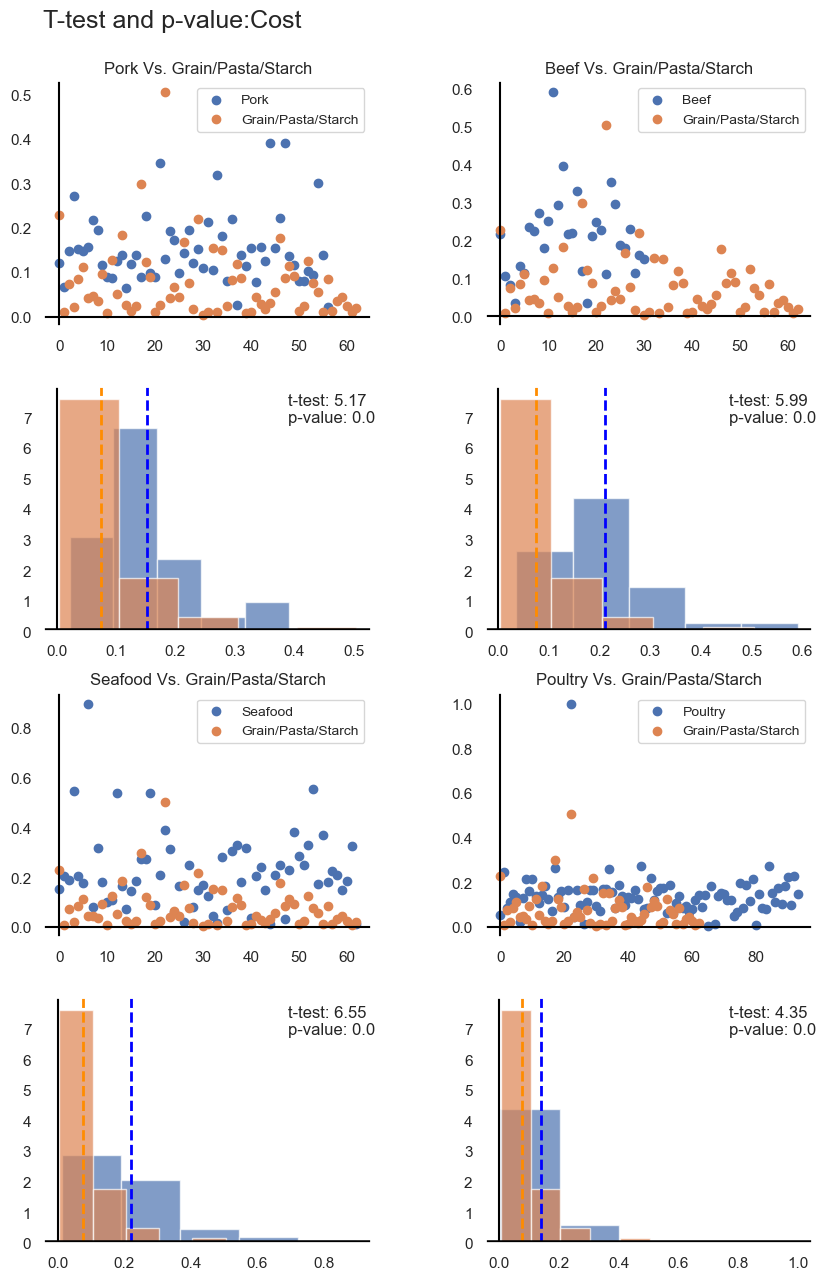

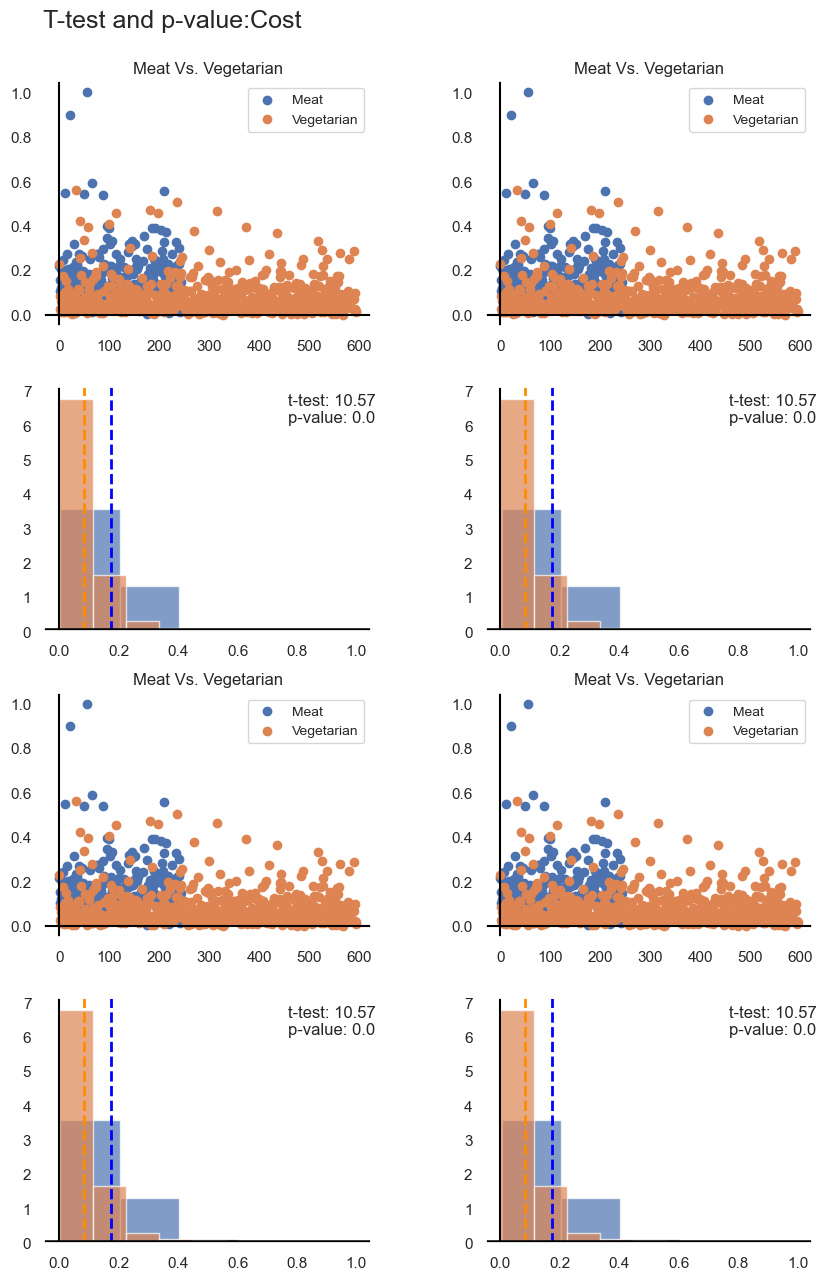

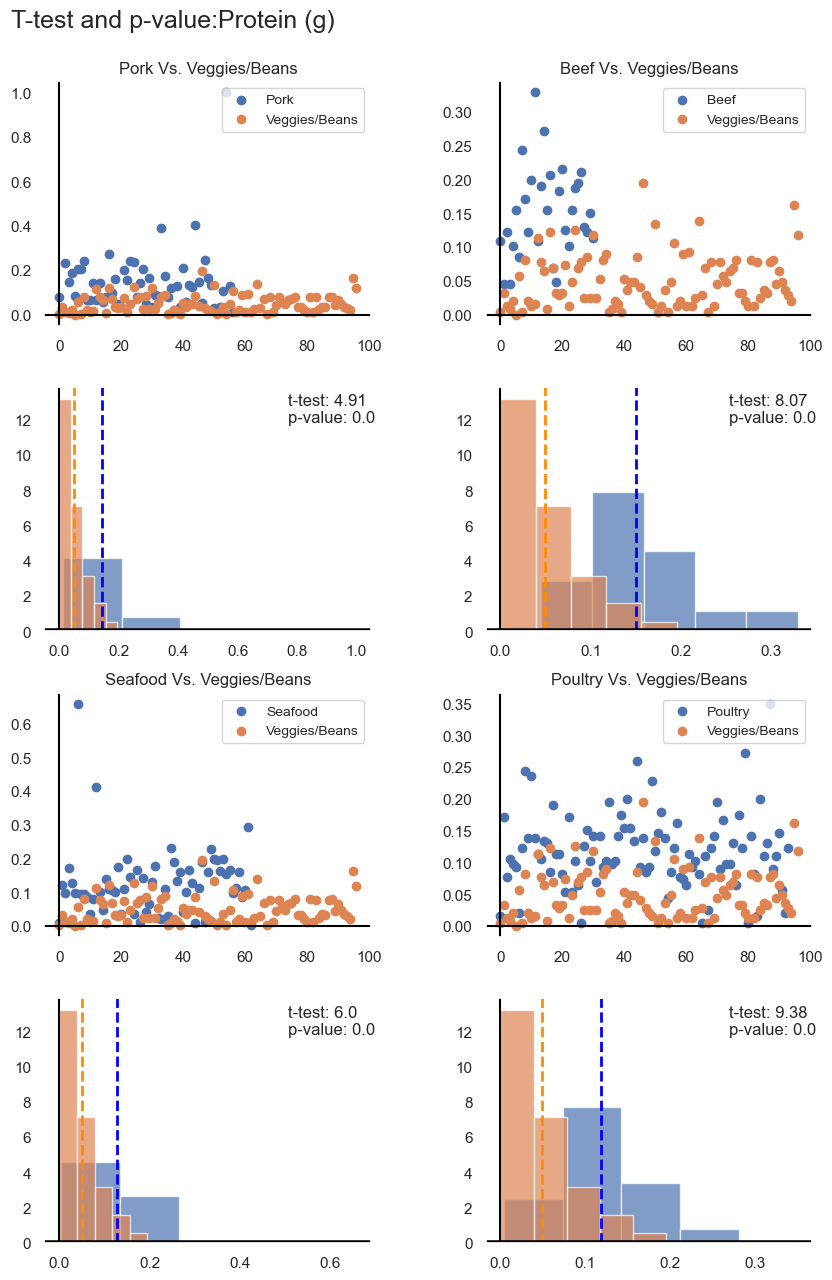

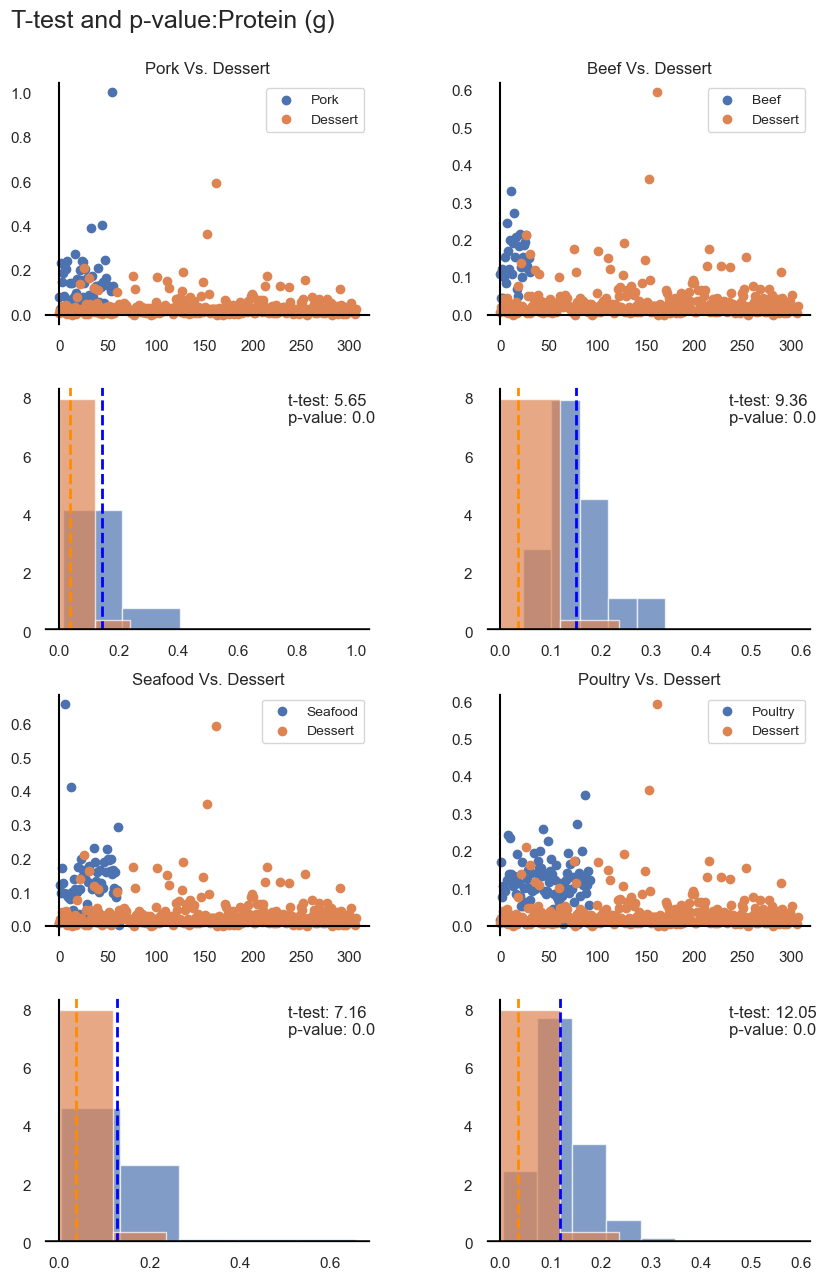

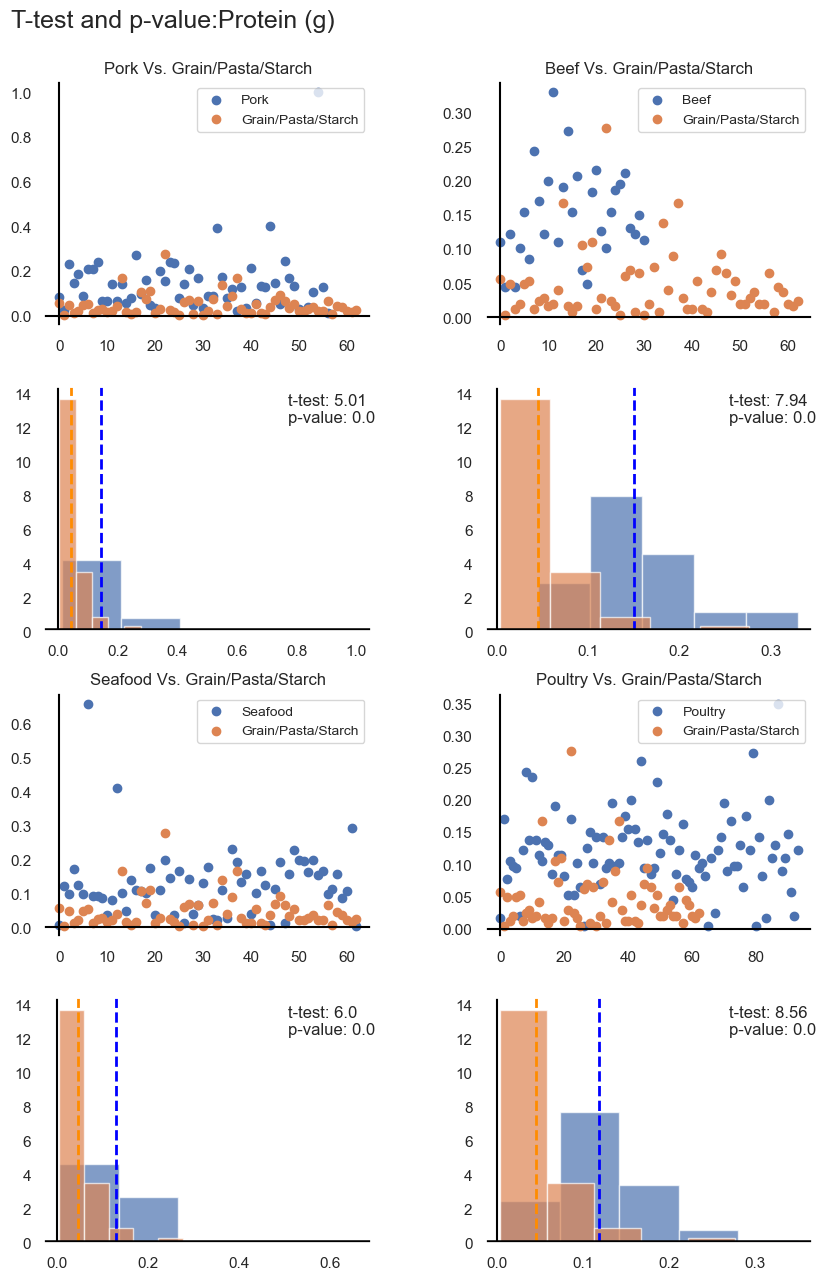

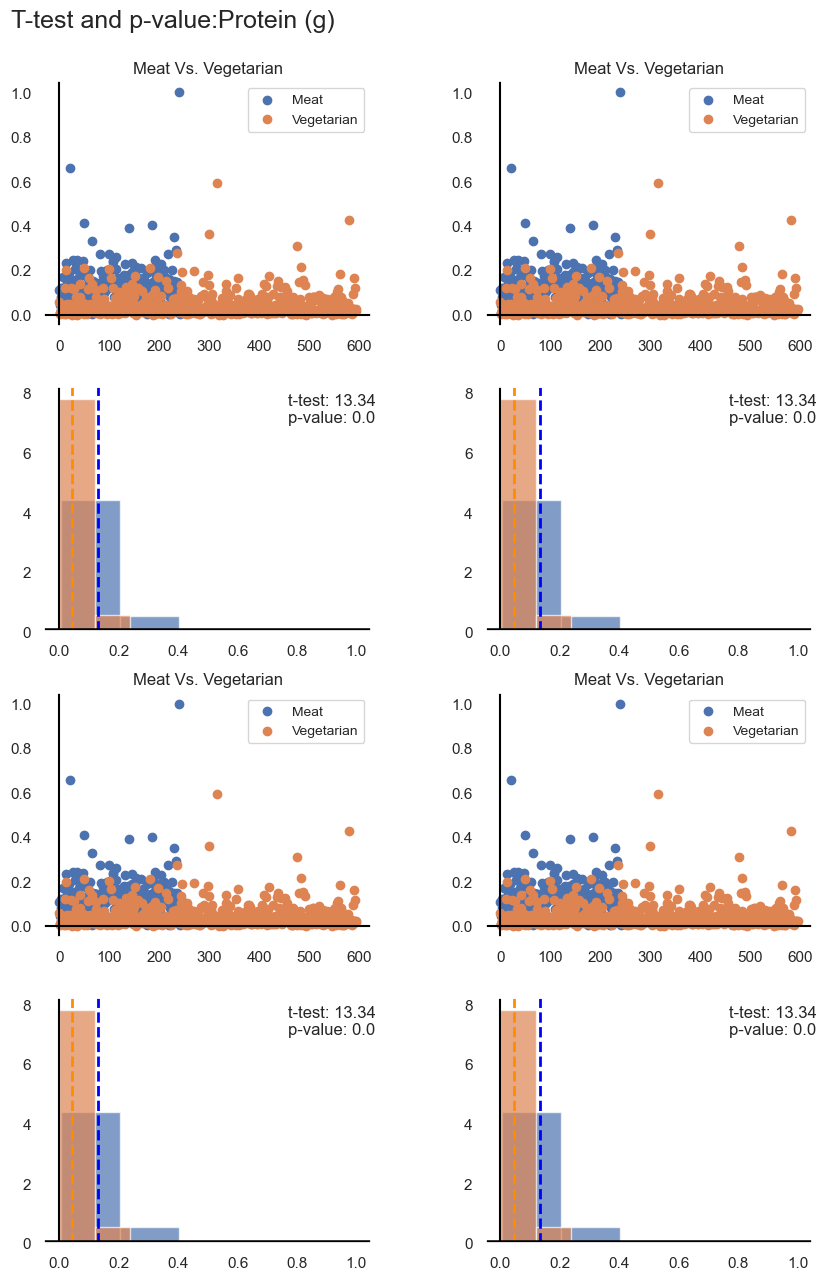

In [19]:
for index, row in ttest_pd.iterrows():
    pop1 = spoon_pd.loc[spoon_pd[row["feature"]] == row["val1"], :]
    pop2 = spoon_pd.loc[spoon_pd[row["feature"]] == row["val2"], :]
    ttest1, pval1 = st.ttest_ind(pop1[row["metric"]], pop2[row["metric"]], equal_var = False)

    pop3 = spoon_pd.loc[spoon_pd[row["feature"]] == row["val3"], :]
    pop4 = spoon_pd.loc[spoon_pd[row["feature"]] == row["val4"], :]
    ttest2, pval2 = st.ttest_ind(pop3[row["metric"]], pop4[row["metric"]], equal_var = False)
        
    pop5 = spoon_pd.loc[spoon_pd[row["feature"]] == row["val5"], :]
    pop6 = spoon_pd.loc[spoon_pd[row["feature"]] == row["val6"], :]
    ttest3, pval3 = st.ttest_ind(pop5[row["metric"]], pop6[row["metric"]], equal_var = False)
        
    pop7 = spoon_pd.loc[spoon_pd[row["feature"]] == row["val7"], :]
    pop8 = spoon_pd.loc[spoon_pd[row["feature"]] == row["val8"], :]
    ttest4, pval4 = st.ttest_ind(pop7[row["metric"]], pop8[row["metric"]], equal_var = False)
        
    fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7)) = plt.subplots(nrows=4, ncols=2)
    #plt.figure(figsize=(8, 6), dpi=80)
    fig.tight_layout(pad = 3)
    fig.suptitle('T-test and p-value:' + row["metric"], fontsize = 18, y = 2.65)
    
    ax0.set_title('Center Title')
    ax0.scatter(range(len(pop1)), pop1[row["metric"]], label=row["val1"])
    ax0.scatter(range(len(pop2)), pop2[row["metric"]], label=row["val2"])
    ax0.set_title(row["val1"] + " Vs. " + row["val2"])
    ax0.legend(prop={'size': 10}, loc = "upper right", facecolor='white')
    ax0.set_facecolor("White")
    ax0.axhline(linewidth=1.5, color='black')
    ax0.axvline(linewidth=1.5, color='black')

    ax1.scatter(range(len(pop3)), pop3[row["metric"]], label=row["val3"])
    ax1.scatter(range(len(pop4)), pop4[row["metric"]], label=row["val4"])
    ax1.set_title(row["val3"] + " Vs. " + row["val4"])
    ax1.legend(prop={'size': 10}, loc = "upper right", facecolor='white')
    ax1.set_facecolor("White")
    ax1.axhline(linewidth=1.5, color='black')
    ax1.axvline(linewidth=1.5, color='black')    
    
    ax2.hist(pop1[row["metric"]], 5, density=True, alpha=0.7, label=row["val1"])
    ax2.hist(pop2[row["metric"]], 5, density=True, alpha=0.7, label=row["val2"])
    ax2.axvline(pop1[row["metric"]].mean(), color='blue', linestyle='dashed', linewidth=2)
    ax2.axvline(pop2[row["metric"]].mean(), color='darkorange', linestyle='dashed', linewidth=2)
    ax2.set_facecolor("White")
    ax2.axhline(linewidth=4, color='black')
    ax2.axvline(linewidth=1.5, color='black')    

    ax3.hist(pop3[row["metric"]], 5, density=True, alpha=0.7, label=row["val3"])
    ax3.hist(pop4[row["metric"]], 5, density=True, alpha=0.7, label=row["val4"])
    ax3.axvline(pop3[row["metric"]].mean(), color='blue', linestyle='dashed', linewidth=2)
    ax3.axvline(pop4[row["metric"]].mean(), color='darkorange', linestyle='dashed', linewidth=2)
    ax3.set_facecolor("White")
    ax3.axhline(linewidth=4, color='black')
    ax3.axvline(linewidth=1.5, color='black')    
        
    ax4.scatter(range(len(pop5)), pop5[row["metric"]], label=row["val5"])
    ax4.scatter(range(len(pop6)), pop6[row["metric"]], label=row["val6"])
    ax4.set_title(row["val5"] + " Vs. " + row["val6"])
    ax4.legend(prop={'size': 10}, loc = "upper right", facecolor='white')
    ax4.set_facecolor("White")
    ax4.axhline(linewidth=1.5, color='black')
    ax4.axvline(linewidth=1.5, color='black')    
 
    ax5.scatter(range(len(pop7)), pop7[row["metric"]], label=row["val7"])
    ax5.scatter(range(len(pop8)), pop8[row["metric"]], label=row["val8"])
    ax5.set_title(row["val7"] + " Vs. " + row["val8"])
    ax5.legend(prop={'size': 10}, loc = "upper right", facecolor='white')
    ax5.set_facecolor("White")
    ax5.axhline(linewidth=1.5, color='black')
    ax5.axvline(linewidth=1.5, color='black')    
    
    ax6.hist(pop5[row["metric"]], 5, density=True, alpha=0.7, label=row["val5"])
    ax6.hist(pop6[row["metric"]], 5, density=True, alpha=0.7, label=row["val6"])
    ax6.axvline(pop5[row["metric"]].mean(), color='blue', linestyle='dashed', linewidth=2)
    ax6.axvline(pop6[row["metric"]].mean(), color='darkorange', linestyle='dashed', linewidth=2)
    ax6.set_facecolor("White")
    ax6.axhline(linewidth=4, color='black')
    ax6.axvline(linewidth=1.5, color='black')    

    ax7.hist(pop7[row["metric"]], 5, density=True, alpha=0.7, label=row["val7"])
    ax7.hist(pop8[row["metric"]], 5, density=True, alpha=0.7, label=row["val8"])
    ax7.axvline(pop7[row["metric"]].mean(), color='blue', linestyle='dashed', linewidth=2)
    ax7.axvline(pop8[row["metric"]].mean(), color='darkorange', linestyle='dashed', linewidth=2)
    ax7.set_facecolor("White")
    ax7.axhline(linewidth=4, color='black')
    ax7.axvline(linewidth=1.5, color='black')
        
    plt.figtext(.68, 1.825, f"t-test: {round(ttest1, 2)}")
    plt.figtext(.68, 1.79, f"p-value: {round(pval1, 4)}")
    plt.figtext(1.37, 1.825, f"t-test: {round(ttest2, 2)}")
    plt.figtext(1.37, 1.79, f"p-value: {round(pval2, 4)}")
    plt.figtext(.68, .55, f"t-test: {round(ttest3, 2)}")
    plt.figtext(.68, .515, f"p-value: {round(pval3, 4)}")
    plt.figtext(1.37, .55, f"t-test: {round(ttest4, 2)}")
    plt.figtext(1.37, .515, f"p-value: {round(pval4, 4)}")
    
    filename = str(index) + row["val7"] + " Vs. " + row["val8"] + ".png"
    filename = filename.replace("/", "")
    plt.subplots_adjust(top=2.5, bottom=0.08, left=0.3, right=1.5, hspace=0.25, wspace=0.35)
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.savefig(filename, bbox_inches = "tight")
    plt.show()

In [20]:
bins = [0, .025, .05, .075, .1, .125, float("inf")]
group_labels = ["1", "2", "3", "4", "5", "6"]
spoon_pd["Calorie Group"] = pd.cut(spoon_pd["Calories"], bins, labels = group_labels)

bins = [0, .025, .05, .075, .1, .125, float("inf")]
group_labels = ["1", "2", "3", "4", "5", "6"]
spoon_pd["Fat Group"] = pd.cut(spoon_pd["Fat (g)"], bins, labels = group_labels)

bins = [0, .025, .05, .075, .1, .125, float("inf")]
group_labels = ["1", "2", "3", "4", "5", "6"]
spoon_pd["Protein Group"] = pd.cut(spoon_pd["Protein (g)"], bins, labels = group_labels)

spoon_pd.head()

,Name,Cost,Protein (g),Calories,Fat (g),Servings,Preparation Time (m),Health Score,Gluten Free,Vegetarian,Dairy Free,name lower,Food Type,Meat Type,Calorie Group,Fat Group,Protein Group
0,Butternut Squash Gnocchi With Whiskey Cream Sauce,0.227864,0.056911,0.158203,0.070336,0.016949,0.061069,0.11,False,False,False,butternut squash gnocchi with whiskey cream sauce,Grain/Pasta/Starch,Vegetarian,6,3,3
1,Oreo Cookies & Cream No-Bake Cheesecake,0.027245,0.008130,0.061865,0.055046,0.152542,0.061069,0.00,False,True,False,oreo cookies & cream no-bake cheesecake,Dessert,Vegetarian,3,3,1
2,Philly Cheesesteak Grilled Wraps,0.217337,0.109756,0.122807,0.070336,0.016949,0.061069,0.32,True,False,True,philly cheesesteak grilled wraps,Beef,Meat,5,3,5
3,Beef Tenderloin With Creamy Alouette® Mushroom...,0.105263,0.044715,0.110188,0.100917,0.000000,0.061069,0.07,True,False,False,beef tenderloin with creamy alouette® mushroom...,Beef,Meat,5,5,2
4,Mussels & Clams in White Wine {Cozze e Vongole},0.153560,0.008130,0.031702,0.012232,0.016949,0.061069,0.18,True,True,True,mussels & clams in white wine {cozze e vongole},Seafood,Meat,2,1,1


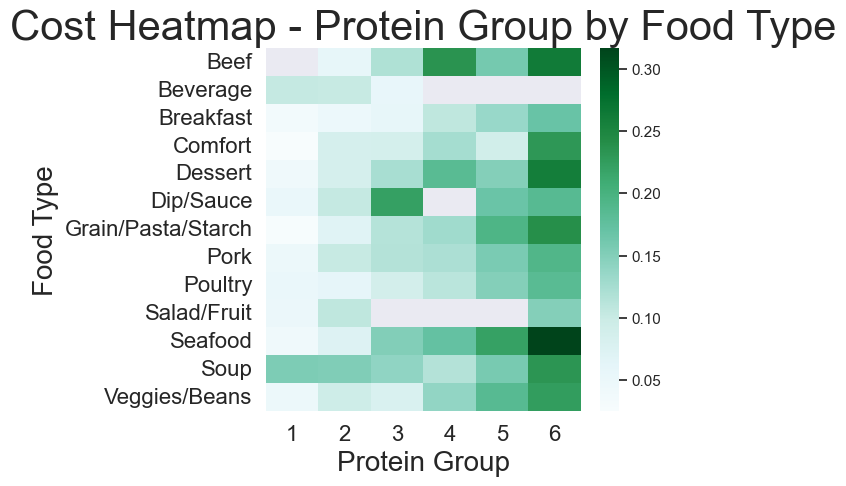

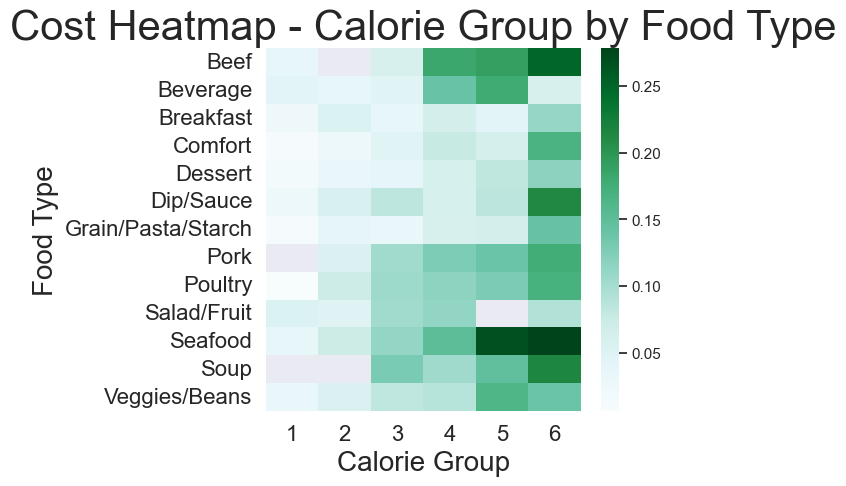

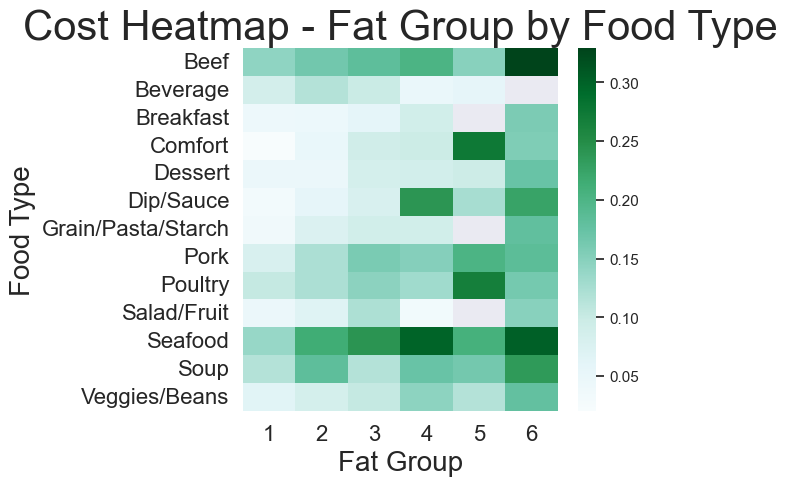

In [21]:
def heat(index_feature, value_feature, col_feature, title, filename):
    df2 = spoon_pd[[f"{value_feature}", f"{index_feature}", f"{col_feature}"]]
    heatmap2_data = pd.pivot_table(df2,values=f"{value_feature}", index=[f"{index_feature}"], columns=f"{col_feature}")
    heatmap2_data.head(n=5)
    ax = plt.axes()
    sns.heatmap(heatmap2_data, cmap="BuGn")
    ax.set_title(title, fontsize=30)
    ax.set_xlabel(f"{col_feature}", fontsize=20)
    ax.set_ylabel(f"{index_feature}", fontsize=20)
    plt.subplots_adjust(top=2.5, bottom=0.08, left=0.3, right=1.5, hspace=0.25, wspace=0.35)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.savefig(filename, bbox_inches = "tight")
    return plt.show()
    
    
heat('Food Type', 'Cost', 'Protein Group', "Cost Heatmap - Protein Group by Food Type", "Cost Heatmap - Protein Group by Food Type.png")
heat('Food Type', 'Cost', 'Calorie Group', "Cost Heatmap - Calorie Group by Food Type", "Cost Heatmap - Calorie Group by Food Type.png")
heat('Food Type', 'Cost', 'Fat Group', "Cost Heatmap - Fat Group by Food Type", "Cost Heatmap - Fat Group by Food Type.png")

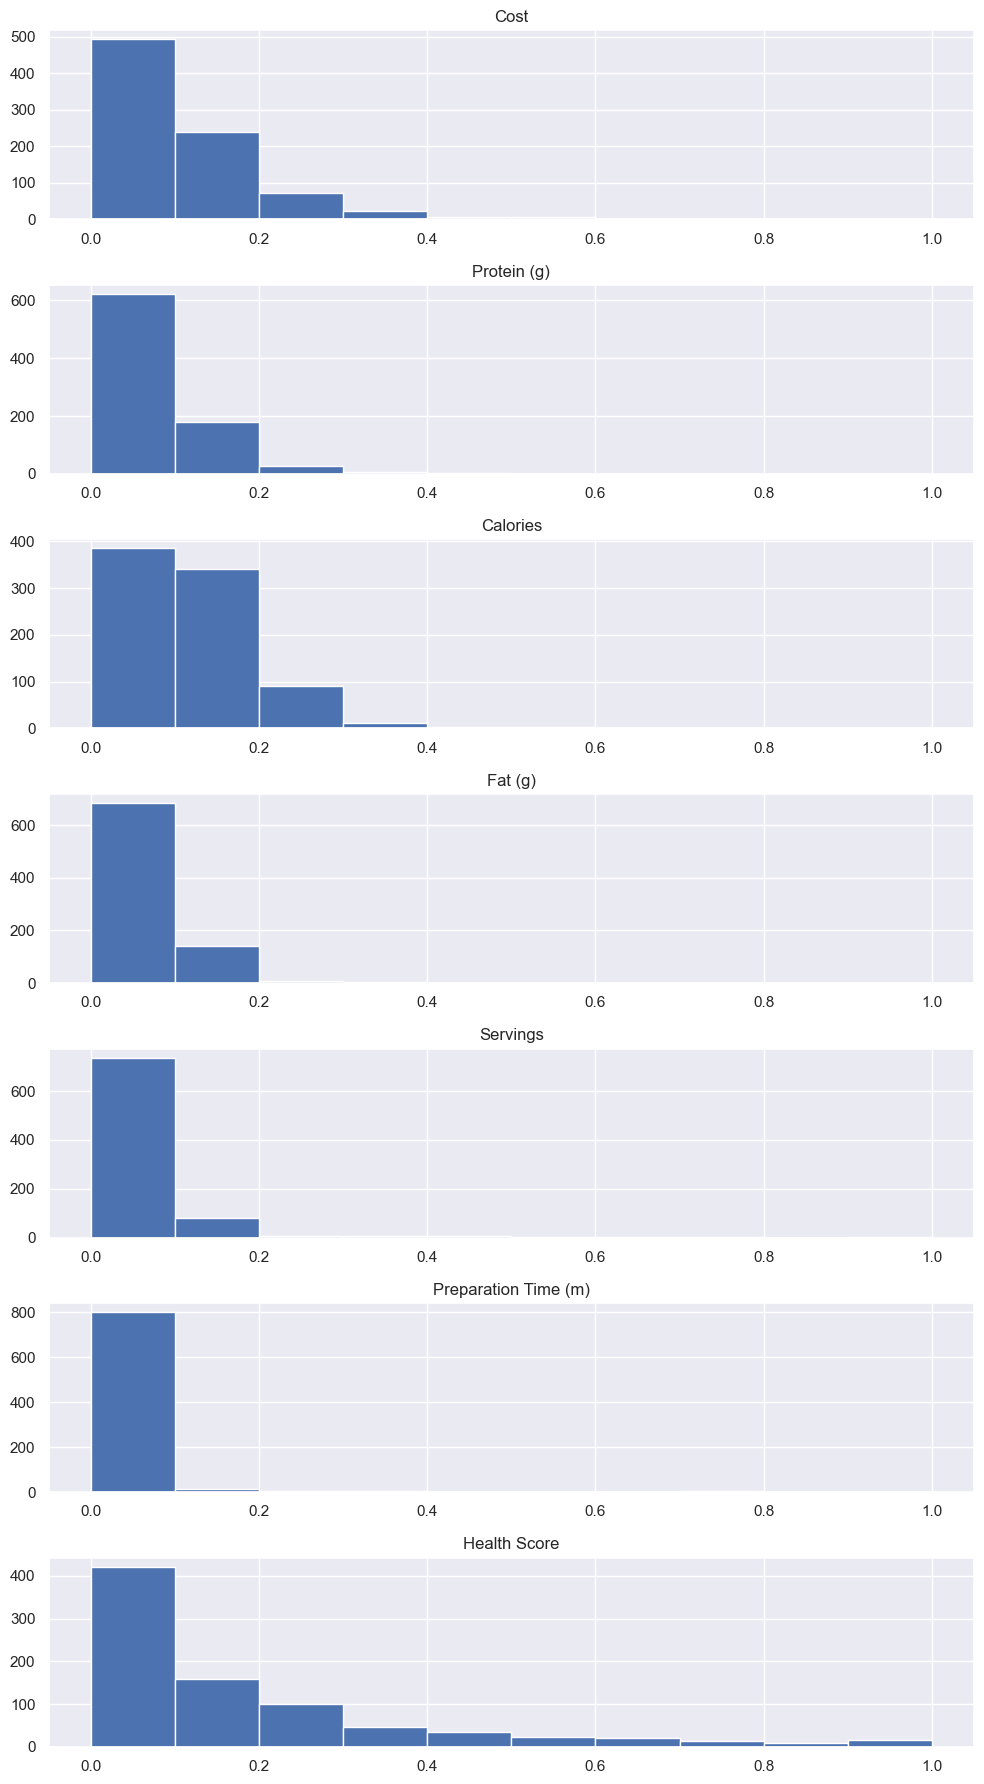

In [22]:
fig, axis = plt.subplots(7,1,figsize=(10, 18))
spoon_pd.hist(ax=axis)
fig.tight_layout()
plt.savefig('7factor.png')
plt.show()

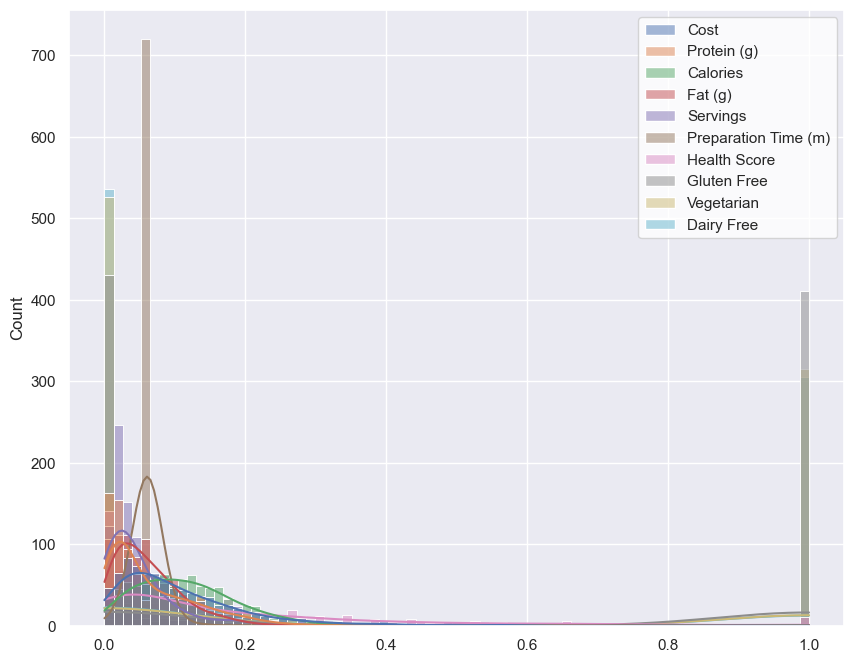

In [23]:
fig, axis = plt.subplots(1,1,figsize=(10, 8))
sns.set_style("white")
sns.histplot(spoon_pd,kde=True)
fig.savefig('7factor_by_serve.png')
plt.show()

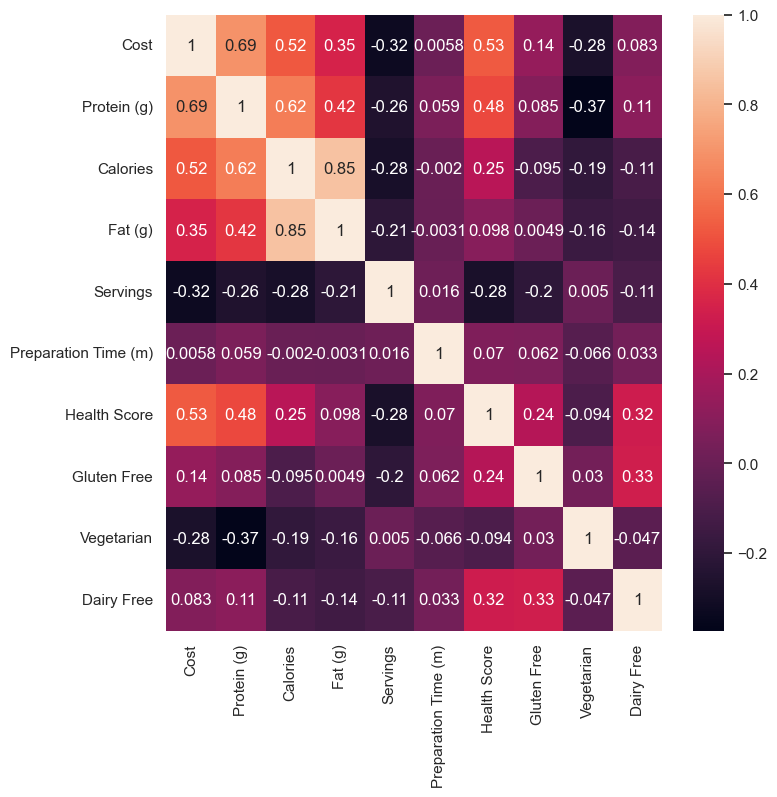

In [24]:
fig, axis = plt.subplots(1,1,figsize=(8, 8))
hm = sns.heatmap(spoon_pd.corr(), annot = True)
plt.show()

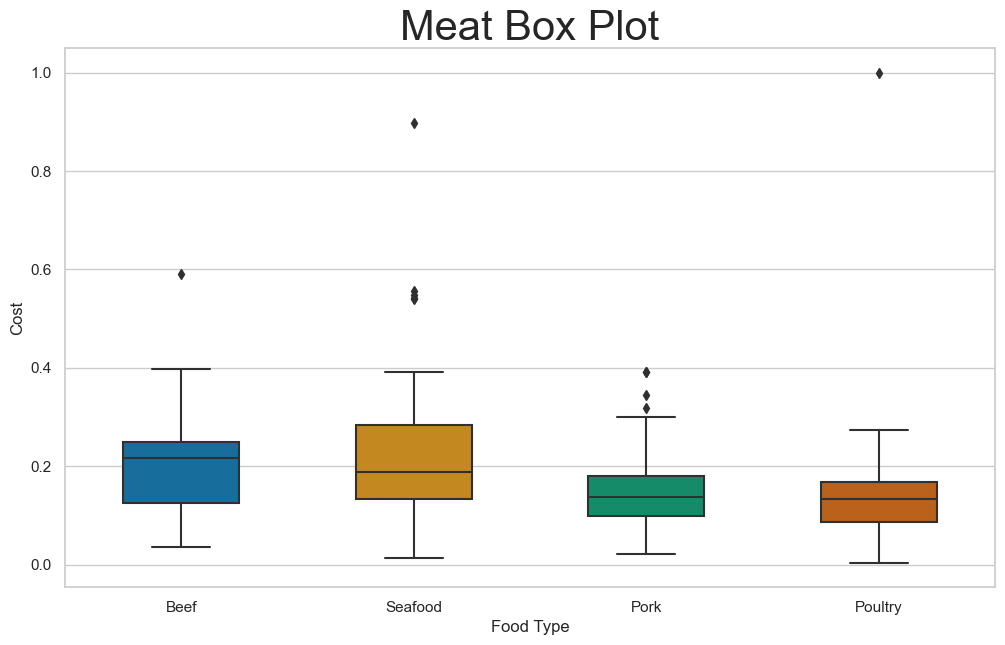

In [47]:
bplot = sns.boxplot(y='Cost', x='Food Type', 
                 data=protein_df, 
                 width=0.5,
                 palette="colorblind").set_title("Meat Box Plot", fontsize = 30)
sns.set_style("whitegrid")
filename = "Meat Boxplot.png"
plt.savefig(filename)
plt.show()

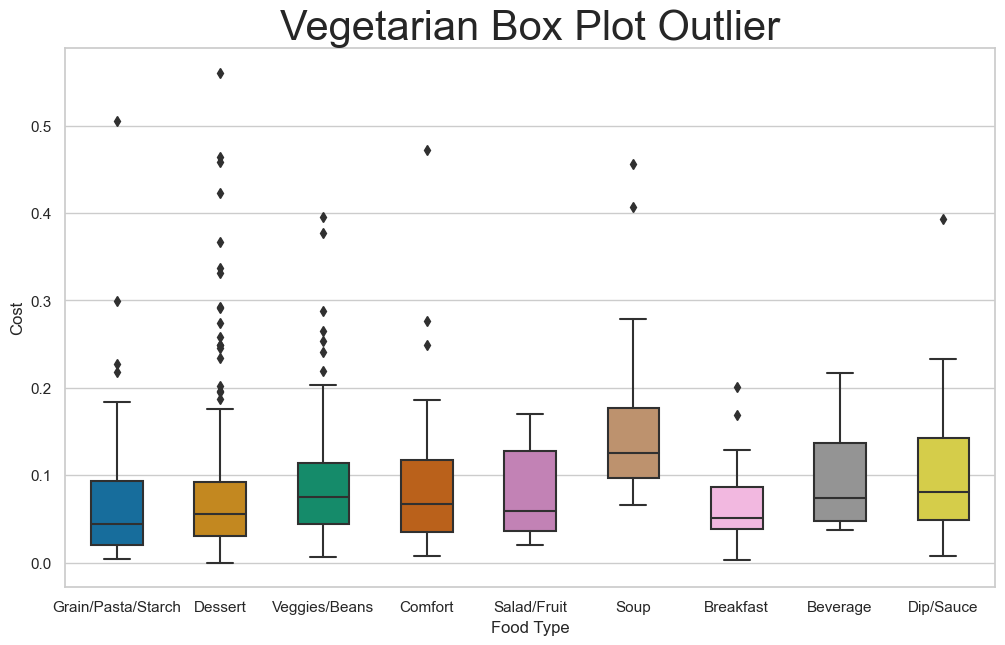

In [44]:
bplot = sns.boxplot(y='Cost', x='Food Type', 
                 data=vegetarian_df, 
                 width=0.5,
                 palette="colorblind").set_title("Vegetarian Box Plot Outlier", fontsize = 30)
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style("whitegrid")
filename = "Vegetarian Boxplot.png"
plt.savefig(filename)
plt.show()

In [27]:
group1 = spoon_pd[spoon_pd["Food Type"] == "Veggies/Beans"]["Cost"]
group2 = spoon_pd[spoon_pd["Food Type"] == "Grain/Pasta/Starch"]["Cost"]
group3 = spoon_pd[spoon_pd["Food Type"] == "Soup"]["Cost"]
group4 = spoon_pd[spoon_pd["Food Type"] == "Beverage"]["Cost"]
group5 = spoon_pd[spoon_pd["Food Type"] == "Beef"]["Cost"]
group6 = spoon_pd[spoon_pd["Food Type"] == "Poultry"]["Cost"]
group7 = spoon_pd[spoon_pd["Food Type"] == "Pork"]["Cost"]
group8 = spoon_pd[spoon_pd["Food Type"] == "Seafood"]["Cost"]
group9 = spoon_pd[spoon_pd["Food Type"] == "Dessert"]["Cost"]
group10 = spoon_pd[spoon_pd["Food Type"] == "Breakfast"]["Cost"]
group11= spoon_pd[spoon_pd["Food Type"] == "Comfort"]["Cost"]
group12 = spoon_pd[spoon_pd["Food Type"] == "Dip/Sauce"]["Cost"]
group13 = spoon_pd[spoon_pd["Food Type"] == "Salad/Fruit"]["Cost"]
st.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12, group13)

F_onewayResult(statistic=19.125086907020208, pvalue=5.437947579292303e-37)